# Creazione modelli text analysis
Ho visto che il decision tree è il modello che mi offre migliori performance, soprattutto con TfIdf e tokenizzazione nltk/regex con stemming PorterStemmer().


In [1]:
from my_tokenizer import MyTokenizer
from classification import Classification
from model import Model
import pandas as pd

È necessaria la normalizzazione delle feature, dato che nel testo abbiamo i nomi delle squadre ed i soprannomi, vado a sostituire tutte le parole relative alla squadra di casa con home team e stessa cosa per la away team.
Questo viene fatto tramite il metodo feature_normalization()

In [2]:
mt = MyTokenizer(pd.read_csv("description_predictions.csv", index_col=0))
mt.feature_normalization()
mt.clean_text()
X_train, X_test, y_train, y_test = mt.set_bigram_and_get_sets()

## Classificazione del modello
Migliori risultati con Decision Tree.
Viene salvato il modello

In [3]:
c = Classification(X_train, X_test, y_train, y_test)

c.create_models()
c.gen_report()

### Ottenimento accuratezza 0.8
Ottenimento di un'alta accuratezza, iterando fino a quando non la ottengo

In [ ]:
accuracy = 0

while(accuracy < 0.79):
    c.create_models()
    c.gen_report()
    accuracy = c.E.Accuracy.values[0]

,Accuracy,Avg Precision (macro),Avg Recall (macro),Avg F1-score (macro),Avg Precision (weighted),Avg Recall (weighted),Avg F1-score (weighted)
Model,,,,,,,
Decision Tree,0.802632,0.858178,0.767236,0.794731,0.834137,0.802632,0.800829


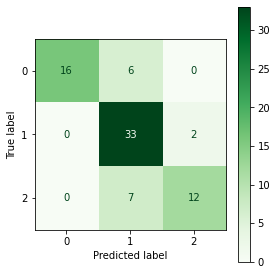

In [4]:
c.get_higher_accuracies(0.2)
c.save_best_model()

c.max_accuracy.gen_confusion_matrix()

## Lettura modello
Lettura del modello salvato

In [4]:
c = Classification(X_train, X_test, y_train, y_test)
c.open_model()
c.loaded_model.score(X_test, y_test)

0.8026315789473685